In [1]:
import numpy as np
import pyclesperanto_prototype as cle

## Setup example data

In [2]:

voxel_size_x_in_microns = 0.1449922
voxel_size_y_in_microns = 0.1449922
voxel_size_z_in_microns = 0.3

deskewing_angle_in_degrees = 30


rbc = np.ones([150, 118, 209])
rbc.shape

(150, 118, 209)

## Deskew it

In [3]:
deskewed = cle.deskew_y(rbc, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns)

deskewed.shape

(59, 413, 209)

To reverse the deskewing transformation from deskewed volume back into the original volume, we need to get the deskewing-transformation first as an object.

In [4]:
transform = cle.AffineTransform3D()
transform._deskew_y(angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns)

Compute the size of the original image stack and the corresponding transform

In [5]:
new_size, autosize_transform, translation = cle._tier8._affine_transform._determine_translation_and_bounding_box(
                                    rbc, transform)

new_size

[59, 413, 209]

## Invert the transform
Once we set up the transform, we can invert it.

In [6]:
inverse_transform = autosize_transform.inverse()

## Apply the inverse transform

In [15]:
undeskewed = cle.affine_transform(deskewed, transform=inverse_transform, auto_size=True)

undeskewed.shape

(249, 118, 209)

In [16]:
rbc.shape

(150, 118, 209)

## Visualize where the pixels went

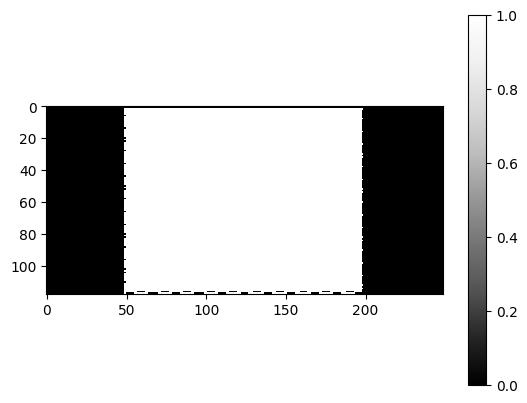

In [17]:
cle.imshow(cle.maximum_x_projection(undeskewed), colorbar=True)

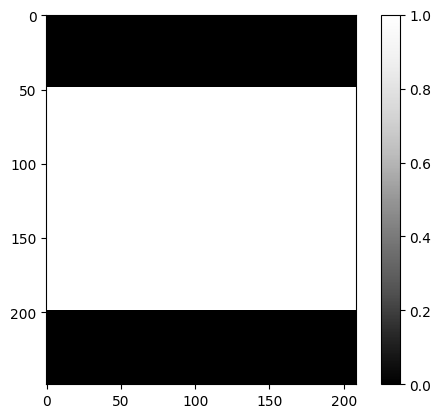

In [18]:
cle.imshow(cle.maximum_y_projection(undeskewed), colorbar=True)

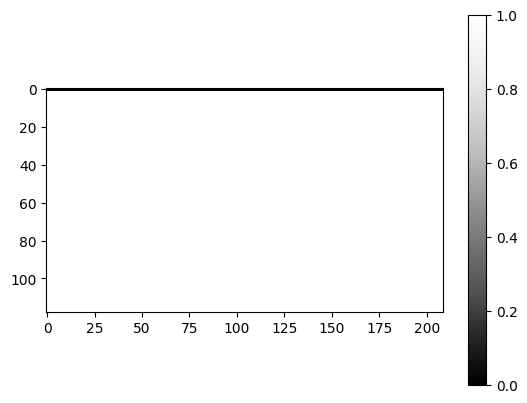

In [19]:
cle.imshow(cle.maximum_z_projection(undeskewed), colorbar=True)